In [1]:
import pandas as pd
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt
import scipy as sp
import numpy as np

# Weighted Least Squares Regression {-}

First, we load in the dataset.

In [2]:
df = pd.read_csv('wls_data.csv')

In [3]:
x = df['x'].values
y = df['y'].values

## Problem 1 {-}

### Part A {-}

We first create an ordinary least squares regression model ignoring the lack of homoskedasticity.

In [4]:
ols_model = sm.OLS(y, sm.add_constant(x))

### Part B {-}

We fit the model to the data.

In [5]:
ols_results = ols_model.fit()

### Part C {-}

We can view a summary of the regression.

In [6]:
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     3806.
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          2.25e-235
Time:                        21:55:47   Log-Likelihood:                -1263.7
No. Observations:                 500   AIC:                             2531.
Df Residuals:                     498   BIC:                             2540.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1393      0.136     15.757      0.0

Given that the $p$-values are equal to `0.000`, we can conclude that the coefficients are statistically significant (assuming homoskedasticity). The confidence interval for `x1`appears to be quite narrow also, instilling confidence in our results.

### Part D {-}

We use the model to create the predicted values.

In [7]:
ols_y_hat = ols_results.predict(sm.add_constant(x))

### Part E {-}

Using the fitting results, we extract the residuals.

In [8]:
ols_residuals = ols_results.resid  # y - ols_y_hat

### Part F {-}

To get a sense of the fit, we plot the predictions with the actual data.

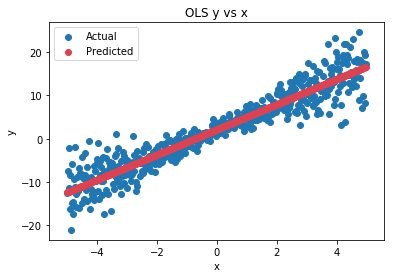

In [9]:
plt.scatter(x, y, label='Actual')
plt.scatter(x, ols_y_hat, color='#DE4250', label='Predicted')

plt.legend()
plt.title('OLS y vs x')
plt.ylabel('y')
_ = plt.xlabel('x')

### Part G {-}

The fit appears quite good in terms of bias. The predictions are definitely in the middle of the actual results. However, there is clear heteroskedasticity. The values farther from $0$ seem to have more variance than values closer to $0$.

### Part H {-}

To inspect this result further, we can plot the residuals.

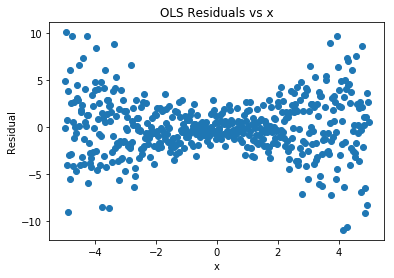

In [10]:
plt.scatter(x, ols_residuals)

plt.title('OLS Residuals vs x')
plt.ylabel('Residual')
_ = plt.xlabel('x')

### Part I {-}

This definitely confirms the suspicion of heteroskedasticity. The values farther from zero have significantly larger magnitude residuals than those closer to zero.

### Part J {-}

We can plot a QQ-plot vs the Normal distribtution.

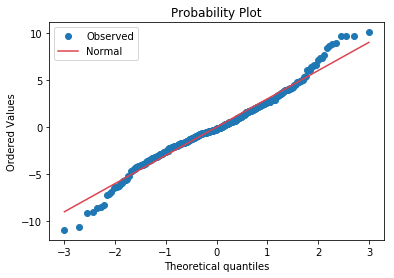

In [11]:
_, ax = plt.subplots()

sp.stats.probplot(ols_residuals, plot=ax)

ax.get_lines()[0].set_color('#1F78B4')
ax.get_lines()[1].set_color('#DE4250')

ax.get_lines()[0].set_label('Observed')
ax.get_lines()[1].set_label('Normal')

_ = plt.legend()

### Part K {-}

The residuals do not appear to be perfectly normally distributed. The tails seem to be a bit thinner than a Normal distribution.

## Problem 2 {-}

### Part A {-}

We create a function to estimate the variances to perform weighted ordinary least squares to remove heteroskedasticity.

In [12]:
def est_W(residuals, x):
    """Estimates the variance for each input in `x` 
    in the attempt to remove heteroskedasticity.
    
    Args:
        residuals (ndarray): An array of length `num_obs`
            of the residuals of OLS regression of `y` on `x`.
        x (ndarray): An array of length `num_obs` containing
            the original observations.
        
    Returns:
        ndarray: An array of shape `num_obs` of the estimated
            variance for each observation.
    
    """
    # Create the OLS model
    resid2_x2_model = sm.OLS(residuals ** 2, sm.add_constant(x ** 2))
    
    # Fit the model to the data
    resid2_x2_results = resid2_x2_model.fit()
    
    # Return the predictions
    return resid2_x2_results.predict(sm.add_constant(x ** 2))

### Part B {-}

We use our function to produce estimates of the weights (variances) of the observations.

In [13]:
sig_est = est_W(ols_residuals, x)

### Part C {-}

We plot the residuals alongside the estimates of the standard deviations of the observations.

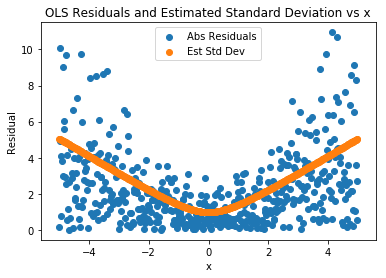

In [14]:
plt.scatter(x, np.abs(ols_residuals), label='Abs Residuals')
plt.scatter(x, np.sqrt(sig_est), label='Est Std Dev')

plt.legend()
plt.title('OLS Residuals and Estimated Standard Deviation vs x')
plt.ylabel('Residual')
_ = plt.xlabel('x')

### Part D {-}

The plot shows that there is definite heteroskedasticity and demonstrates that the standard deviation increases farther from zero. The estimated weights definitely appear correct as they increase with larger magnitude and decrease will less magnitude residuals. Around the 2-3 range of `x`, there could be a little better accuracy, as the relationship doesn't appear as linear, but that is getting picky.

### Part E {-}

Using the estimated variance, we construct the weights for weighted ordinary least squares.

In [15]:
weights = 1 / np.sqrt(sig_est)

### Part F {-}

We use the weights to construct the necessary components to run weighted least squares.

In [16]:
X = np.concatenate([np.ones_like(x).reshape(-1, 1), x.reshape(-1, 1)], 
                   axis=1)
W = np.diag(weights)

### Part G {-}

Now we construct a ordinary least squares model using the weights.

In [17]:
wls_model = sm.OLS(W @ y, W @ X)

### Part H {-}

As before, we compute and extract the results, predictions, and residuals.

In [18]:
wls_results = wls_model.fit()
wls_y_hat = wls_results.predict(W @ X)
wls_residuals = wls_results.resid

### Part I {-}

We can view a summary of the regression.

In [19]:
print(wls_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1912.
Date:                Wed, 20 Mar 2019   Prob (F-statistic):          2.00e-234
Time:                        21:55:49   Log-Likelihood:                -706.08
No. Observations:                 500   AIC:                             1416.
Df Residuals:                     498   BIC:                             1425.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0553      0.084     24.544      0.0

The coefficient values remain consistent with OLS as expected. However, the standard error has increased slightly from OLS and thus the confidence intervals are not as tight.

### Part J {-}

To inspect the result further, we can plot the residuals.

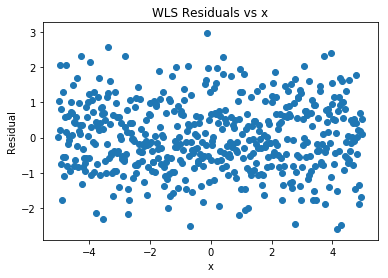

In [20]:
plt.scatter(x, wls_residuals)

plt.title('WLS Residuals vs x')
plt.ylabel('Residual')
_ = plt.xlabel('x')

The residuals give the impression of no further heteroskedasticity as their variances remain similar for all `x`.

### Part K {-}

We can plot a QQ-plot vs the Normal distribtution.

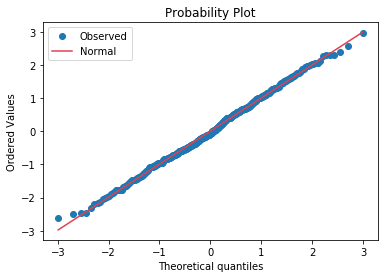

In [21]:
_, ax = plt.subplots()

sp.stats.probplot(wls_residuals, plot=ax)

ax.get_lines()[0].set_color('#1F78B4')
ax.get_lines()[1].set_color('#DE4250')

ax.get_lines()[0].set_label('Observed')
ax.get_lines()[1].set_label('Normal')

_ = plt.legend()

### Part L {-}

The normal fit is substantially better. The tails are no longer thinner than Normal. Everything lines up well with the normal distribution.

### Part M {-}

We take the predicted values from the weighted least squares and tranform them back to the original scale.

In [22]:
wls_y_hat_transformed = np.linalg.inv(W) @ wls_y_hat

### Part N {-}

To get a better sense of the fit, we plot the predictions.

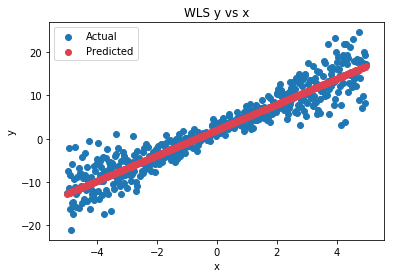

In [23]:
plt.scatter(x, y, label='Actual')
plt.scatter(x, wls_y_hat_transformed, color='#DE4250', label='Predicted')

plt.legend()
plt.title('WLS y vs x')
plt.ylabel('y')
_ = plt.xlabel('x')

### Part O {-}

#### Part I {-}

The coefficient estimates are essentially the same. This is expected as the heteroskedasticity should not affect the bias of the estimator.

#### Part II {-}

The standard errors are different. This is also expected as the heteroskedasticity is taken into consideration when calculating standard errors in WLS and assumed homoskedastic in the OLS.